# EDA for `score`






- Distribution of `score`
- Relation between score and other columns

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
#f = "/content/drive/MyDrive/all_data.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define the paths
f = "all_data.csv" 

In [ ]:
# Packages imported
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [ ]:
df = pd.read_csv(f)

### Distribution of `score`

In [ ]:
#numeric description
df.score.describe()

count    4.543567e+06
mean     9.594097e+00
std      1.162538e+02
min     -2.379000e+03
25%      1.000000e+00
50%      2.000000e+00
75%      5.000000e+00
max      3.638500e+04
Name: score, dtype: float64

Text(0.5, 1.0, 'Histogram of Score')

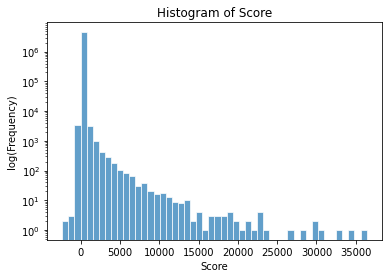

In [ ]:
plt.hist(df['score'],bins=50,edgecolor='white',alpha = 0.7)
plt.yscale('log')
plt.xlabel('Score')
plt.ylabel('log(Frequency)')
plt.title('Histogram of Score')

<AxesSubplot:ylabel='score'>

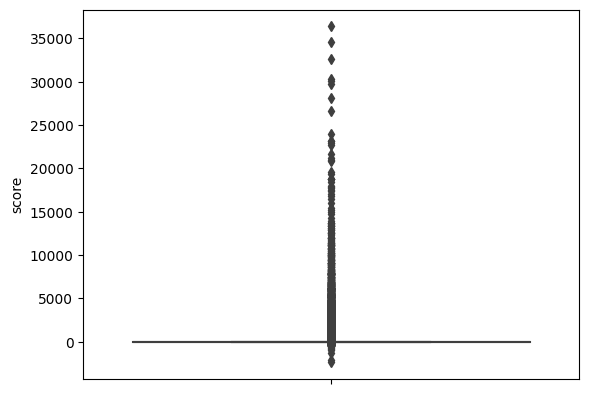

In [ ]:
sns.boxplot(y = 'score', data = df)

The data is in wide range, so we need to scale for better observation on features.

Text(0, 0.5, '±log(|score|)')

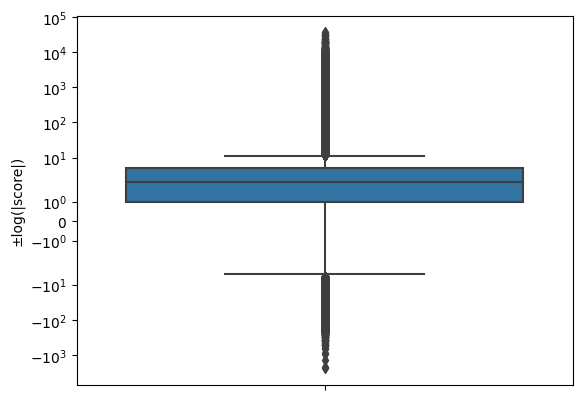

In [ ]:
sns.boxplot(y = 'score', data = df)
plt.yscale('symlog') 
plt.ylabel('±log(|score|)')

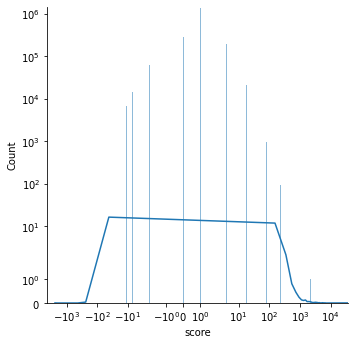

In [ ]:
sns.displot(data = df,x='score',kde=True)
plt.xscale('symlog')
plt.yscale('symlog')

the score data is highly dispersed

### Relation between `score` and other variables. 

#### `score` vs `sentiment`

In [ ]:
corr = df.corr()['sentiment']['score']
print('Correlation coefficient:', corr)
corr, p_value = pearsonr(df.sentiment, df.score)
print('Pearson correlation coefficient:', corr)
print('P value:', p_value)

Correlation coefficient: -0.003690481445669533
Pearson correlation coefficient: -0.003690481445669617
P value: 3.646317619034791e-15


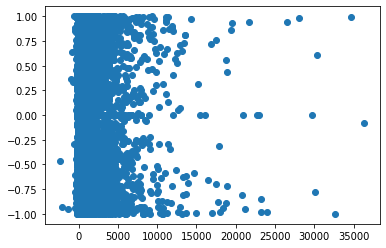

In [ ]:
plt.scatter(df['score'],df['sentiment'])

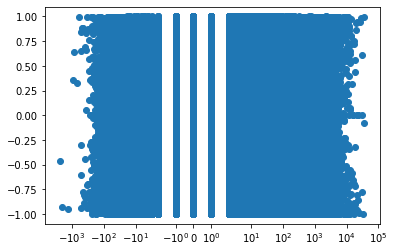

In [ ]:
plt.scatter(df['score'],df['sentiment'])
plt.xscale('symlog')

They are obviously not related.

#### `score` vs `created_utc`

In [ ]:
from datetime import datetime
import pytz

def utc2date(utcint):
  utc_timestamp = utcint

  utc_time = datetime.utcfromtimestamp(utc_timestamp)

  utc_timezone = pytz.utc
  local_timezone = pytz.timezone('Asia/Shanghai')

  local_time = utc_timezone.localize(utc_time).astimezone(local_timezone)
  return local_time


In [ ]:
df['time'] = df.created_utc.apply(lambda x: utc2date(x))

Text(0, 0.5, 'Score')

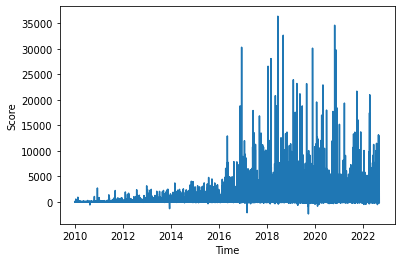

In [ ]:
plt.plot(df.time,df.score)
plt.xlabel('Time')
plt.ylabel('Score')

In [ ]:
date = df.set_index('time')
grouped = date.groupby(pd.Grouper(freq='Y'))
grouped['score'].mean()

time
2010-12-31 00:00:00+08:00     3.069711
2011-12-31 00:00:00+08:00     3.946177
2012-12-31 00:00:00+08:00     4.857688
2013-12-31 00:00:00+08:00     5.171495
2014-12-31 00:00:00+08:00     5.484205
2015-12-31 00:00:00+08:00     6.373368
2016-12-31 00:00:00+08:00     9.292118
2017-12-31 00:00:00+08:00    10.988296
2018-12-31 00:00:00+08:00    10.816942
2019-12-31 00:00:00+08:00     9.367452
2020-12-31 00:00:00+08:00    10.029883
2021-12-31 00:00:00+08:00    10.227187
2022-12-31 00:00:00+08:00    10.012214
Freq: A-DEC, Name: score, dtype: float64

Text(0.5, 1.0, 'Mean Score by Year')

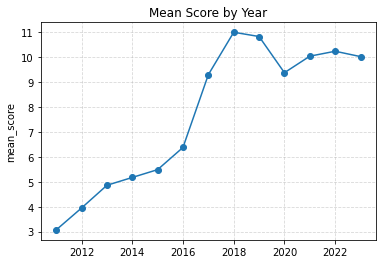

In [ ]:
plt.plot(grouped['score'].mean(),marker='o', markersize=6)
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylabel('mean_score')
plt.title('Mean Score by Year')